<center>
  <a href="2.5-intro-to-munging.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.6.1.A(G)%20Visualisation.ipynb">Next Page</a></center>
</center>

#  2.6. Overview of Matplotlib, Pandas.plot, and Seaborn

##  2.6.1 Matplotlib vs  Pandas.plot vs Seaborn

The Python visualization landscape is **fairly diverse and has many choices** in the libraries that we can use. Here, we will introduce three: 

Matplotlib — Python’s most used plotting library.
Seaborn — Statistical plotting functions, better matplotlib aesthetics, and easier to use.
Pandas.plot — Declarative plotting directly from a Pandas DataFrame, also easy to use.

#### Matplotlib (https://matplotlib.org/)
Matplotlib is a Python 2D plotting library. Matplotlib can generate publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

#### Panda.plot (https://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot)
Pandas provides a ggplot like API for creating plots from Pandas DataFrames. This module is built on top of Matplotlib.

#### Seaborn (http://seaborn.pydata.org/)
Seaborn is complimentary to Matplotlib. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.
For more detailed information: see http://seaborn.pydata.org/introduction.html 

Note: Please the data requirement for these three plots are different.
For instance, 
* Pandas.plot expects the data in a wide format (Columns=[A, B, C, D, E, F, X]), while A-F is Y
 * i.e., X=x-axis, A-F=y-axis (6 values/lines in y axis) LINE graph
* Seaborn expects the data in a **tidy** format (Columns=[Group, Y, X])

```
In Pandas.plot and matplotlib, the format of the data is
A B C D E F X
0 1 2 3 4 5 2001
7 8 9 1 2 3 2009

e.g., X-axis is **Year**

In Seaborn, the data is
Group  Y   X
A      0   2001
B      1   2001
C      2   2001
D      3   2001
E      4   2001
F      5   2001
A      7   2009
B      8   2009
C      9   2009
D      1   2009
E      2   2009
F      3   2009
```

In [1]:
import numpy as np
import pandas as pd

##### Loading Data

In [2]:
df=pd.read_csv('Sales6Countries.csv', index_col=0)

In [3]:
df.dtypes

Japan        float64
Germany      float64
USA          float64
India        float64
Australia    float64
Turkey       float64
Day            int64
dtype: object

In [4]:
df.shape

(356, 7)

In [5]:
df.head()

,Japan,Germany,USA,India,Australia,Turkey,Day
0,103.218852,410.598502,144.043571,1454.273507,761.037725,121.675016,1
1,340.644381,744.272829,1638.122644,1249.115243,1074.105427,732.420723,2
2,2212.345435,1397.891425,2502.558843,506.950223,3343.860051,2186.786397,3
3,2166.586918,1210.707575,4035.338058,1976.308993,3498.807476,1808.623878,4
4,3054.372665,770.088893,3687.425908,2132.657962,4729.098157,606.244029,5


## 2.6.1.A: Example of Line Chart in Matplotlib

In [10]:
x=df['Day']
x

0        1
1        2
2        3
3        4
4        5
      ... 
351    352
352    353
353    354
354    355
355    356
Name: Day, Length: 356, dtype: int64

In [8]:
y=df.iloc[:, 0:-1]
y
# new_y = y.squeeze()
# type(new_y)

,Japan,Germany,USA,India,Australia,Turkey
0,103.218852,410.598502,144.043571,1454.273507,761.037725,121.675016
1,340.644381,744.272829,1638.122644,1249.115243,1074.105427,732.420723
2,2212.345435,1397.891425,2502.558843,506.950223,3343.860051,2186.786397
3,2166.586918,1210.707575,4035.338058,1976.308993,3498.807476,1808.623878
4,3054.372665,770.088893,3687.425908,2132.657962,4729.098157,606.244029
...,...,...,...,...,...,...
351,19875.242319,13462.884164,4941.282436,6162.302127,11781.744327,23699.472749
352,18572.061357,13591.420481,4798.834567,4853.538613,12984.219635,23283.373115
353,18772.968891,13713.951799,4751.556852,5517.682662,13768.907047,23618.953759
354,16876.786662,12914.165660,4469.981421,4928.295960,13324.125684,22596.561436


In [9]:
y.max()

Japan        27470.626205
Germany      18871.298799
USA          24397.850556
India        14868.051532
Australia    17007.471974
Turkey       24204.288206
dtype: float64

In [30]:
y.describe()

,Japan,Germany,USA,India,Australia,Turkey
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,18208.890328,5412.500121,6648.584551,7016.205050,5418.989444,9498.826185
std,5688.248899,5485.667979,5506.889802,4486.341199,5147.679999,6037.538037
min,103.218852,48.145898,11.442473,15.006347,26.951914,121.675016
25%,15598.470170,1445.520196,2892.025412,2755.444602,1365.369369,5554.767917
50%,19755.182618,3019.395031,4985.245978,6512.234231,3070.341512,9085.380218
75%,22231.591047,7110.370949,8218.472798,11048.547095,10679.885052,11364.258487
max,27470.626205,18871.298799,24397.850556,14868.051532,17007.471974,24204.288206


In [15]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

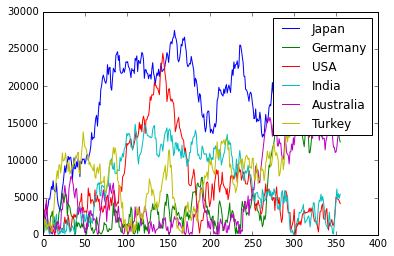

In [19]:
# Plot the data with Matplotlib defaults
plt.plot(y)
plt.legend(y)
plt.show()

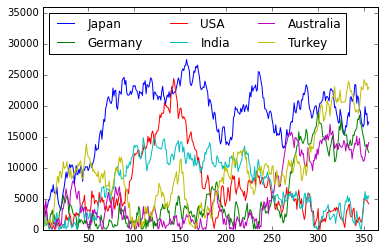

In [20]:
plt.plot(y)
plt.legend(y, ncol=3, loc='upper left');
plt.xlim(1,365)
plt.ylim(0,36000)
plt.show()

## 2.6.1.B: Example of Line Chart in Pandas.Plot

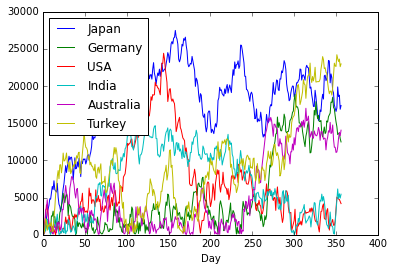

In [17]:
df.plot(x='Day')
plt.show()


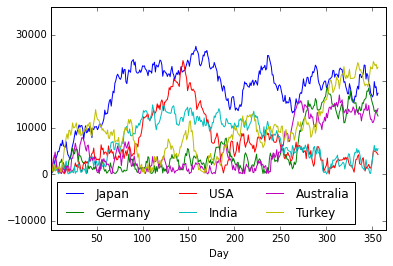

In [18]:
df.plot(x='Day')
plt.legend(y, ncol=3, loc='lower left');
plt.xlim(1,365)
plt.ylim(-12000,36000)
plt.show()

## 2.6.1.C: Example of Line Chart in Seaborn

In [21]:
import seaborn as sns
import pandas as pd

In [22]:
formated=pd.melt(df,["Day"], var_name="Group", value_name="Y")


In [23]:
df.head()

,Japan,Germany,USA,India,Australia,Turkey,Day
0,103.218852,410.598502,144.043571,1454.273507,761.037725,121.675016,1
1,340.644381,744.272829,1638.122644,1249.115243,1074.105427,732.420723,2
2,2212.345435,1397.891425,2502.558843,506.950223,3343.860051,2186.786397,3
3,2166.586918,1210.707575,4035.338058,1976.308993,3498.807476,1808.623878,4
4,3054.372665,770.088893,3687.425908,2132.657962,4729.098157,606.244029,5


In [24]:
formated.head()

,Day,Group,Y
0,1,Japan,103.218852
1,2,Japan,340.644381
2,3,Japan,2212.345435
3,4,Japan,2166.586918
4,5,Japan,3054.372665


In [25]:
formated.shape
#365 X 3 = 2136

(2136, 3)

In [26]:
sns.set() #to reset to seaborn default --affecting matplotlib

<AxesSubplot:xlabel='Day', ylabel='Y'>

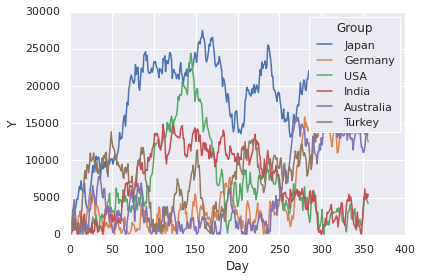

In [27]:
sns.lineplot(x="Day", y="Y", hue="Group", data=formated)
#
#             size="coherence", hue="choice",
#             legend="full", data=dots)

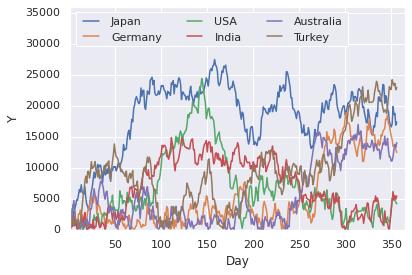

In [28]:
sns.lineplot(x="Day", y="Y", hue="Group", data=formated)
plt.legend(y, ncol=3, loc='upper left');
plt.xlim(1,365)
plt.ylim(0,36000)
plt.show()

## Comparison of Line Chart between Matplotlib, Pandas.Plot, and Seaborn


|Chart Type|Matplotlib | Pandas.Plot| Seaborn
|- |- | - | - 
|Line Chart|![matline](resources\img\matline.png) | ![panline](resources\img\panline.png) | ![sealine.png](resources\img\sealine.png)


## 2.6.2.A: Histogram using Matplotlib

In [48]:
import pandas as pd

In [49]:
df1 = pd.read_excel('histogram.xls')

In [50]:
df1.head()

,Unnamed: 0,x,y
0,0,0.313363,2.231888
1,1,-2.761529,-3.393027
2,2,-1.245906,-0.363368
3,3,-2.198248,-0.125763
4,4,1.915599,-0.241169


In [51]:
df1.describe()

,Unnamed: 0,x,y
count,2000.000000,2000.000000,2000.000000
mean,999.500000,-0.049480,-0.007668
std,577.494589,2.261237,1.396299
min,0.000000,-8.213970,-4.903714
25%,499.750000,-1.580128,-0.908828
50%,999.500000,-0.016461,-0.000082
75%,1499.250000,1.488194,0.906168
max,1999.000000,7.021713,5.402919


In [52]:
df1['x'].mean()

-0.04947961539281296

In [53]:
df1['y'].mean()

-0.007668177639270466

In [54]:
df1['y'].std()

1.3962986448374903

In [55]:
df1['x'].std()

2.2612370934488117

In [56]:
import matplotlib.pyplot as plt; 
plt.rcdefaults()

In [57]:
plt.style.use('classic')
for col in df1:
    print (col)

Unnamed: 0
x
y


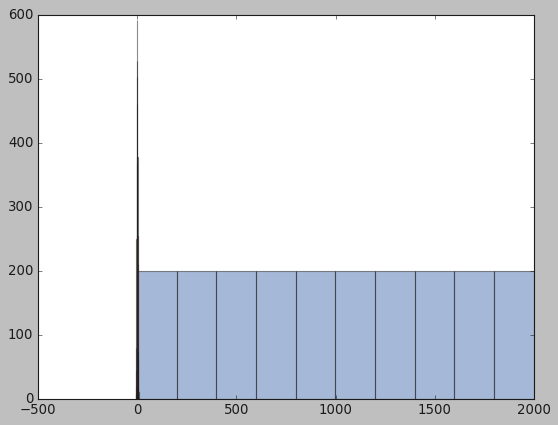

In [58]:
for col in df1:
    plt.hist(df1[col], density=False, alpha=0.5)

```
density : boolean, optional
    If ``True``, the first element of the return tuple will
    be the counts normalized to form a probability density, i.e.,
    the area (or integral) under the histogram will sum to 1.
    ```
    

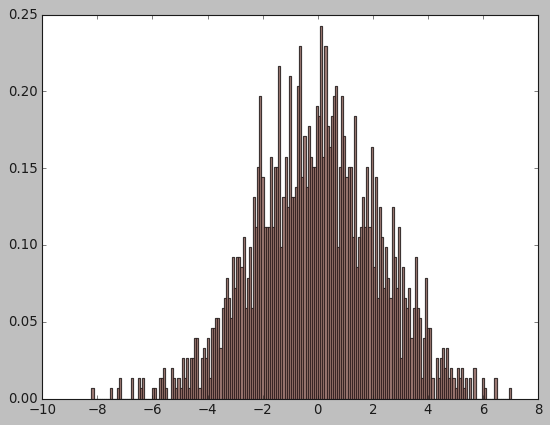

In [68]:
for col in df1:
#     print(col)
    plt.hist(df1['x'], bins=200, density=True, alpha=0.5)
#     plt.hist(df1['x'], density=True, alpha=0.5)    

## 2.6.2.B: Histogram using Pandas.Plot

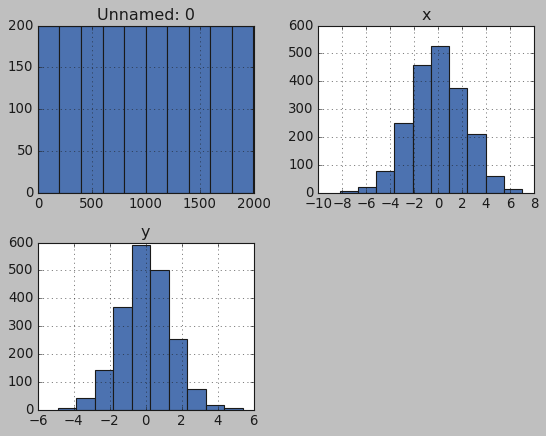

In [41]:
df1.hist()
plt.show()

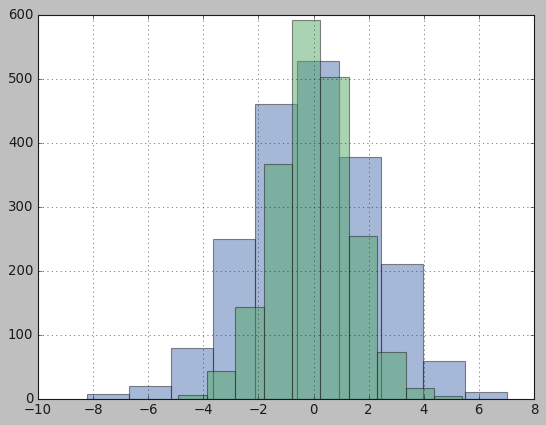

In [42]:
df1.x.hist(alpha=0.5)
df1.y.hist(alpha=0.5)
plt.show()


## 2.6.2.C: Histogram using Seaborn

/home/mpheng/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


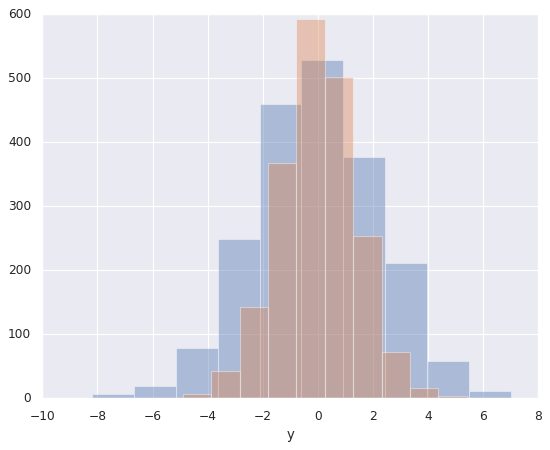

In [43]:
import seaborn as sns
sns.set()
sns.distplot(df1.x, bins=10, kde=False);
sns.distplot(df1.y, bins=10, kde=False);


## Comparison of Histogram between Matplotlib, Pandas.Plot, and Seaborn


|Chart Type|Matplotlib | Pandas.Plot| Seaborn
|- |- | - | - 
|Histogram|![matline](resources\img\mathist.png) | ![panline](resources\img\panhist.png) | ![sealine.png](resources\img\seahist.png)


<center>
  <a href="2.5-intro-to-munging.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.6.1.A(G)%20Visualisation.ipynb">Next Page</a></center>
</center>